In [24]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import mlxtend
from sklearn.preprocessing import MultiLabelBinarizer
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Data Exploration

In [12]:
# Read in the food_drink_emoji_tweets.txt file
tweets_df = pd.read_csv('./food_drink_emoji_tweets.txt', sep='\t', header=None, names=['Tweets'])
tweets_df

,Tweets
0,RT @CalorieFixess: 🍗🌯🍔🍒 400 Calories https://t...
1,RT @1_F_I_R_S_T: _ 🍈¹〉Grow your account fast! ...
2,RT @LegendDeols: 👉👉👉G€T Ready to dance💃🕺🕺🕺💃💃💃 ...
3,@britch_x Hubby's friend bought us Wendy's-che...
4,RT @DAILYPUPPlES: Workout partner ☕🍌😍 https://...
...,...
9953,#1stTest Brilliant Tension #England need 2wks ...
9954,"RT @Thabang92416252: ""@PinexAndApplex: 🍍🍏 @Emt..."
9955,@nuttysteph84 Steph!! 😭😭 🥓☕️🍳🤦🏼‍♂️❤️x
9956,I'm heading to a wedding. Weekend session afoo...


In [13]:
emoji_set = {'🍫', '🍡', '🍏', '🍈', '🍯', '🥠', '🍪', '🌰', '🥯', '🍐', '🌯', '🍧', '🥮', '🥚', '🍎', '🍍', '🍠',
'🍨', '🥣', '🍊', '🍘', '🍆', '🥓', '🌽', '🥐', '🌮', '🍬', '🍛', '🥘', '🥔', '🍿', '🍉', '🥞', '🍄', '🎂', '🧀', '🥩',
'🍺', '🦀', '🥦', '🥭', '🍒', '🍤', '🦐', '🥝', '🥙', '🍖', '🥜', '🍥', '🍷', '🍾', '🍲', '🧂', '🥪', '🍚', '🥬', '🥑',
'🍙', '🍞', '🥃', '🥗', '🍕', '🍔', '🥕', '🧁', '🍋', '🍰', '🥫', '🍗', '🥧', '🥛', '🍮', '🥡', '🍟', '🍅', '🥂', '🍸',
'🥥', '🍢', '🍌', '🍝', '🍵', '🍼', '🍦', '🍭', '🍑', '🍹', '🍇', '🥨', '🍱', '🦞', '☕', '🌶', '🍻', '🍳', '🥒', '🍣',
'🥟', '🥖', '🍶', '🍜', '🍓', '🦑', '🍩', '🌭'}

In [14]:
# function to fetch all matching emojis
def fetch_matching_uniq_emojis(text):
    res_set = set()
    for char in text:
        if char in emoji_set:
            res_set.add(char)
    res_arr = np.array(res_set)
    return res_arr

In [15]:
# Extract food/drink emojis from each tweet
tweets_df['Food_drink_emojis'] = tweets_df['Tweets'].apply(lambda row: fetch_matching_uniq_emojis(row))
tweets_df

,Tweets,Food_drink_emojis
0,RT @CalorieFixess: 🍗🌯🍔🍒 400 Calories https://t...,"{🌯, 🍔, 🍗, 🍒}"
1,RT @1_F_I_R_S_T: _ 🍈¹〉Grow your account fast! ...,"{🍈, 🍉, 🍇, 🍍, 🍓, 🍊}"
2,RT @LegendDeols: 👉👉👉G€T Ready to dance💃🕺🕺🕺💃💃💃 ...,"{🍸, 🥃}"
3,@britch_x Hubby's friend bought us Wendy's-che...,"{🍔, 🍟}"
4,RT @DAILYPUPPlES: Workout partner ☕🍌😍 https://...,"{☕, 🍌}"
...,...,...
9953,#1stTest Brilliant Tension #England need 2wks ...,"{🍻, 🥃}"
9954,"RT @Thabang92416252: ""@PinexAndApplex: 🍍🍏 @Emt...","{🍍, 🍏}"
9955,@nuttysteph84 Steph!! 😭😭 🥓☕️🍳🤦🏼‍♂️❤️x,"{☕, 🥓, 🍳}"
9956,I'm heading to a wedding. Weekend session afoo...,"{🍻, 🍹, 🍷}"


In [16]:
mlb = MultiLabelBinarizer()
# fetch all values of the emojis column to fit MLB
all_emoji_sets = tweets_df['Food_drink_emojis'].values
encoded_emojis = mlb.fit_transform(all_emoji_sets)

In [18]:
encoded_df = pd.DataFrame(encoded_emojis, columns=mlb.classes_)
encoded_df

,☕,🌭,🌮,🌯,🌰,🌶,🌽,🍄,🍅,🍆,...,🥭,🥮,🥯,🦀,🦐,🦑,🦞,🧀,🧁,🧂
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9955,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
freq_df = apriori(encoded_df, min_support=0.01, use_colnames=True)
freq_df

/opt/homebrew/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.058747,(☕)
1,0.019381,(🌭)
2,0.018678,(🌮)
3,0.012452,(🌶)
4,0.013858,(🌽)
...,...,...
106,0.031332,"(🍾, 🎂)"
107,0.057040,"(🥂, 🍾)"
108,0.024402,"(🥂, 🎂)"
109,0.011749,"(🍹, 🍸, 🍷)"


## Exploratory Data Analysis (EDA)

### Different emojis used in the dataset

In [20]:
all_emojis = set()
for emoji in tweets_df['Food_drink_emojis'].values:
    for val in emoji:
        all_emojis.add(val)
print(f"Number of unique food/drink emojis used in this dataset: {len(all_emojis)}")

Number of unique food/drink emojis used in this dataset: 105


### Average number of emojis used in a tweet

In [21]:
# let's create a new column for count of emojis
tweets_df['Food_drink_emojis_count'] = tweets_df['Food_drink_emojis'].apply(lambda val: len(val))
# fetch the average count of emojis
emojis_mean_count = tweets_df['Food_drink_emojis_count'].mean()
print(f"The number of emojis used per tweet on an average are {emojis_mean_count}")

The number of emojis used per tweet on an average are 2.6340630648724646


#### The distribution

Text(0.5, 1.0, 'Count of emojis used per tweet')

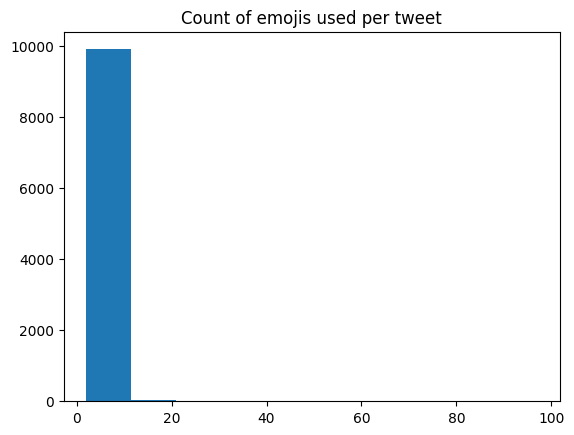

In [25]:
plt.hist(data=tweets_df, x="Food_drink_emojis_count", bins=10)
# x_vals = [i for i in range(0, 30, 2)]
plt.title("Count of emojis used per tweet")

We see that the count of emojis used per tweet is almost all between around 1 to 10.

#### The most popular emojis

In [26]:
# count each emoji
from collections import defaultdict
emoji_count = defaultdict(int)
all_food_drink_emojis = tweets_df['Food_drink_emojis'].tolist()
for emojis in all_food_drink_emojis:
    for emoji in emojis:
        emoji_count[emoji] += 1
emoji_usage_count_sorted = sorted(emoji_count.items(), key=lambda item: item[1], reverse=True)
emoji_usage_count_sorted[:5]

[('🍻', 1809), ('🎂', 1481), ('🍔', 1382), ('🍾', 1078), ('🥂', 1028)]

The 🍻 emoji has been used the most with a usage count of 1809. 

# The Apriori Algorithm

### Function to find frequent itemsets with a specified support value

In [27]:
def emoji_frequent_itemsets(data, k, min_support):
    # data comes in as a 2D matrix
    # one hot encode it
    te = TransactionEncoder()
    te_ary = te.fit(data).transform(data)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    freq_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    freq_itemsets['length'] = freq_itemsets['itemsets'].apply(lambda x: len(x))
    freq_k_itemsets = freq_itemsets[freq_itemsets['length'] == k][['itemsets','support']]
    return freq_k_itemsets

### All frequent 3-itemsets with a minimum support of 0.007.

In [28]:
emoji_frequent_itemsets(tweets_df['Food_drink_emojis'].tolist(), 3, 0.007)

,itemsets,support
155,"(🍉, 🍊, 🍇)",0.007833
156,"(🍔, 🍟, 🍕)",0.009239
157,"(🍬, 🍫, 🍭)",0.007030
158,"(🍹, 🍸, 🍷)",0.011749
159,"(🍸, 🍺, 🍷)",0.007532
160,"(🍻, 🍸, 🍷)",0.007632
161,"(🥂, 🍸, 🍷)",0.007230
162,"(🍹, 🍺, 🍷)",0.007230
163,"(🍻, 🍹, 🍷)",0.007732
164,"(🥂, 🍹, 🍷)",0.007030


## Apriori Algorithm-Deep dive

#### Generate candidate 3-itemsets

In [29]:
def make_set(val):
    emoji_set = set()
    for emoji in val:
        emoji_set.add(emoji)
    return emoji_set

In [30]:
# load all frequent 2-itemsets
freq_2_itemsets = pd.read_csv("./food_emoji_frequent_2_itemsets.csv",header=None)
# convert each value to a set
freq_2_itemsets["2-itemsets"] = freq_2_itemsets[0]
freq_2_itemsets = freq_2_itemsets.drop([0],axis=1)
freq_2_itemsets["2-itemsets"] = freq_2_itemsets["2-itemsets"].apply(lambda val: make_set(val))
freq_2_itemsets

,2-itemsets
0,"{🍔, 🌭}"
1,"{🍕, 🌭}"
2,"{🍔, 🌮}"
3,"{🌮, 🍕}"
4,"{🍆, 🍑}"
...,...
77,"{🍬, 🎂}"
78,"{🍰, 🍭}"
79,"{🍭, 🎂}"
80,"{🍰, 🎂}"


In [31]:
def generate_candidate_3_itemsets(freq_2_itemsets):
    c_3_itemsets = []
    for index in range(0, len(freq_2_itemsets)):
        emoji = freq_2_itemsets[index]
        for nested_index in range(index+1, len(freq_2_itemsets)):
            emoji_to_join = freq_2_itemsets[nested_index]
            emoji_join = emoji.union(emoji_to_join)
            if emoji_join not in c_3_itemsets and len(emoji_join) == 3:
                c_3_itemsets.append(emoji_join)
    return c_3_itemsets

In [32]:
cand_3_itemsets = generate_candidate_3_itemsets(freq_2_itemsets['2-itemsets'].tolist())

In [33]:
len(cand_3_itemsets)

286

#### Prune itemsets

In [34]:
def fetch_subsets(itemset_3):
    li = []
    itemset_3 = list(itemset_3)
    li.append({itemset_3[0], itemset_3[1]})
    li.append({itemset_3[1], itemset_3[2]})
    li.append({itemset_3[0], itemset_3[2]})
    return li

In [35]:
index_to_remove = []
pruned_3_itemsets = []
for itemset_3 in cand_3_itemsets:
    freq = True
    # generate all subsets of the candidate 3 itemsets
    subsets_2_itemsets = fetch_subsets(itemset_3)
    # check if each subset of 2 itemsets is frequent
    for subset in subsets_2_itemsets:
        if subset not in freq_2_itemsets['2-itemsets'].tolist():
            # one itemset is not frequent
            freq = False
            break
    # append to pruned list only if all subsets are frequent
    if freq:
        pruned_3_itemsets.append(itemset_3)
        
print(len(pruned_3_itemsets))

88


### Apriori Algorithm under the Hood (contd.)

In [36]:
def fetch_all_1_indices(val):
    indices = []
    for index in range(0, len(val)):
        if val[index] == 1:
            indices.append(index)
    return indices

In [37]:
def calculate_frequent_itemsets(candidate_itemsets, min_support):
    freq_itemsets = []
    encoded_cand_itemsets = mlb.transform(candidate_itemsets)
    all_records = encoded_df.values
    count_all_records = len(encoded_df.values)
    for i in range(len(encoded_cand_itemsets)):
        # for each candidate itemset
        # fetch all emojis with 1
        cand = encoded_cand_itemsets[i]
        indices_1_count = fetch_all_1_indices(cand)
        count_of_itemset = 0
        for emoji in all_records:
            contains_cand_emojis = True
            for index in indices_1_count:
                if emoji[index] != 1:
                    contains_cand_emojis = False
            if contains_cand_emojis:
                count_of_itemset += 1
        # calculate support count
        support_count = count_of_itemset / count_all_records
        if support_count >= min_support:
            freq_itemsets.append(candidate_itemsets[i])
    return freq_itemsets

In [38]:
calculate_frequent_itemsets(cand_3_itemsets, 0.004)

[{'🌭', '🍔', '🍕'},
 {'🌮', '🍔', '🍕'},
 {'🍇', '🍉', '🍊'},
 {'🍇', '🍉', '🍍'},
 {'🍇', '🍉', '🍓'},
 {'🍇', '🍉', '🥝'},
 {'🍇', '🍊', '🍍'},
 {'🍇', '🍊', '🥝'},
 {'🍇', '🍍', '🥝'},
 {'🍉', '🍊', '🍍'},
 {'🍉', '🍊', '🥝'},
 {'🍉', '🍍', '🥝'},
 {'🍊', '🍍', '🥝'},
 {'🍔', '🍕', '🍗'},
 {'🍔', '🍕', '🍟'},
 {'🍔', '🍗', '🍟'},
 {'🍦', '🍧', '🍨'},
 {'🍦', '🍨', '🍰'},
 {'🍦', '🍫', '🍰'},
 {'🍦', '🍰', '🎂'},
 {'🍫', '🍬', '🍭'},
 {'🍫', '🍰', '🎂'},
 {'🍬', '🍭', '🍰'}]

# Evaluating Frequent Itemsets

#### Applying association rules

In [39]:
freq_itemsets = apriori(encoded_df, min_support=0.005, use_colnames=True)
freq_itemsets = association_rules(freq_itemsets, metric="lift", min_threshold=3)
freq_itemsets

/opt/homebrew/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(☕),(🍩),0.058747,0.031332,0.008435,0.143590,4.582906,0.006595,1.131080,0.830592
1,(🍩),(☕),0.031332,0.058747,0.008435,0.269231,4.582906,0.006595,1.288031,0.807085
2,(🍔),(🌭),0.138783,0.019381,0.011348,0.081766,4.218764,0.008658,1.067939,0.885913
3,(🌭),(🍔),0.019381,0.138783,0.011348,0.585492,4.218764,0.008658,2.077686,0.778043
4,(🍕),(🌭),0.044286,0.019381,0.005021,0.113379,5.849870,0.004163,1.106017,0.867473
...,...,...,...,...,...,...,...,...,...,...
511,"(🍹, 🍺)","(🍻, 🍸)",0.012352,0.014260,0.005122,0.414634,29.076950,0.004945,1.683973,0.977685
512,(🍻),"(🍸, 🍺, 🍹)",0.181663,0.007632,0.005122,0.028192,3.693943,0.003735,1.021157,0.891181
513,(🍸),"(🍻, 🍹, 🍺)",0.052018,0.006527,0.005122,0.098456,15.083398,0.004782,1.101967,0.984937
514,(🍺),"(🍻, 🍸, 🍹)",0.079634,0.007532,0.005122,0.064313,8.539016,0.004522,1.060684,0.959282


#### Calculating mutual information

In [40]:
# P(A) = antecedent support
# P(B) = consequent support
# P(A, B) = support
# P(~A, B) = P(B) - P(A, B)
# P(A, ~B) = P(A) - P(A, B)
# Mutual Info  = P(A,B).log(P(A,B)/P(A).P(B)) + P(A, ~B)log(P(A, ~B)/P(A)P(~B)) + P(~A, B).log(P(~A,B)/P(~A)P(B)) + P(~A, ~B).log(P(~A, ~B)/P(~A)P(~B))
def calc_mutual_info(prob_A, prob_B, prob_A_B):
    prob_not_A = 1 - prob_A
    prob_not_B = 1 - prob_B
    not_prob_A_B = 1 - prob_A_B
    prob_not_A_B = prob_B - prob_A_B
    prob_A_not_B = prob_A - prob_A_B
    val_1 = prob_A_B * np.log2(prob_A_B / (prob_A * prob_B))
    val_2 = prob_A_not_B * np.log2(prob_A_not_B / (prob_A * prob_not_B))
    val_3 = prob_not_A_B * np.log2(prob_not_A_B / (prob_not_A * prob_B))
    val_4 = not_prob_A_B * np.log2(not_prob_A_B / (prob_not_A * prob_not_B))
    mutual_info = val_1 + val_2 + val_3 + val_4
    return mutual_info

In [41]:
def mi(row):
    prob_A = row['antecedent support']
    prob_B = row['consequent support']
    prob_A_B = row['support']
    mutual_info = calc_mutual_info(prob_A, prob_B, prob_A_B)
    return mutual_info

In [42]:
freq_itemsets['mutual_info'] = freq_itemsets.apply(lambda row: mi(row), axis=1)
freq_itemsets

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,mutual_info
0,(☕),(🍩),0.058747,0.031332,0.008435,0.143590,4.582906,0.006595,1.131080,0.830592,0.121253
1,(🍩),(☕),0.031332,0.058747,0.008435,0.269231,4.582906,0.006595,1.288031,0.807085,0.121253
2,(🍔),(🌭),0.138783,0.019381,0.011348,0.081766,4.218764,0.008658,1.067939,0.885913,0.227750
3,(🌭),(🍔),0.019381,0.138783,0.011348,0.585492,4.218764,0.008658,2.077686,0.778043,0.227750
4,(🍕),(🌭),0.044286,0.019381,0.005021,0.113379,5.849870,0.004163,1.106017,0.867473,0.087704
...,...,...,...,...,...,...,...,...,...,...,...
511,"(🍹, 🍺)","(🍻, 🍸)",0.012352,0.014260,0.005122,0.414634,29.076950,0.004945,1.683973,0.977685,0.044845
512,(🍻),"(🍸, 🍺, 🍹)",0.181663,0.007632,0.005122,0.028192,3.693943,0.003735,1.021157,0.891181,0.292400
513,(🍸),"(🍻, 🍹, 🍺)",0.052018,0.006527,0.005122,0.098456,15.083398,0.004782,1.101967,0.984937,0.089179
514,(🍺),"(🍻, 🍸, 🍹)",0.079634,0.007532,0.005122,0.064313,8.539016,0.004522,1.060684,0.959282,0.128429


# Itemset Similarity

### Jaccard Similarity

In [43]:
def jaccard_similarity(set_A, set_B):
    jacc_sim = len(set_A.intersection(set_B)) / len(set_A.union(set_B))
    return jacc_sim

In [44]:
tweets_df

,Tweets,Food_drink_emojis,Food_drink_emojis_count
0,RT @CalorieFixess: 🍗🌯🍔🍒 400 Calories https://t...,"{🌯, 🍔, 🍗, 🍒}",4
1,RT @1_F_I_R_S_T: _ 🍈¹〉Grow your account fast! ...,"{🍈, 🍉, 🍇, 🍍, 🍓, 🍊}",6
2,RT @LegendDeols: 👉👉👉G€T Ready to dance💃🕺🕺🕺💃💃💃 ...,"{🍸, 🥃}",2
3,@britch_x Hubby's friend bought us Wendy's-che...,"{🍔, 🍟}",2
4,RT @DAILYPUPPlES: Workout partner ☕🍌😍 https://...,"{☕, 🍌}",2
...,...,...,...
9953,#1stTest Brilliant Tension #England need 2wks ...,"{🍻, 🥃}",2
9954,"RT @Thabang92416252: ""@PinexAndApplex: 🍍🍏 @Emt...","{🍍, 🍏}",2
9955,@nuttysteph84 Steph!! 😭😭 🥓☕️🍳🤦🏼‍♂️❤️x,"{☕, 🥓, 🍳}",3
9956,I'm heading to a wedding. Weekend session afoo...,"{🍻, 🍹, 🍷}",3


In [45]:
def calc_jacc_score(row, base_emoji_set):
    emoji_set_for_comparison = row['Food_drink_emojis']
    return jaccard_similarity(emoji_set_for_comparison, base_emoji_set)

In [46]:
def compare_tweets(tweet_to_compare):
    emojis_in_twt_to_compare = set()
    for char in tweet_to_compare:
        if char in emoji_set:
            emojis_in_twt_to_compare.add(char)
    similarity_df = tweets_df.copy()
    similarity_df = similarity_df[similarity_df['Tweets'] != tweet_to_compare]
    similarity_df['jacc_score'] = similarity_df.apply(lambda row: calc_jacc_score(row, emojis_in_twt_to_compare), axis=1)
    return similarity_df.sort_values(by='jacc_score', ascending=False)[['Tweets', 'jacc_score']].head(5)

In [47]:
tweets_df.iloc[0]['Tweets']

'RT @CalorieFixess: 🍗🌯🍔🍒 400 Calories https://t.co/9OaPOWUSht'

In [48]:
ret_df = compare_tweets(tweets_df.iloc[0]['Tweets'])
ret_df

,Tweets,jacc_score
6800,RT @levelscafeabuja: Chow! 🤩💦🍗🌯🍔 #LevelsCafeAb...,0.75
3466,@jewishmuseummd @americanart I'm definitely in...,0.50
9900,Turn up the heat this weekend with our Hot 'n'...,0.50
1958,@jenkirk72 @baseball_kay How was the race? Als...,0.50
906,RT @jessxpats: - Food is delicious but afforda...,0.50


In [49]:
ret_df['Tweets'].tolist()

['RT @levelscafeabuja: Chow! 🤩💦🍗🌯🍔 #LevelsCafeAbuja https://t.co/r9YvzPNFpi',
 "@jewishmuseummd @americanart I'm definitely in! I bet we can find some lovely landscape locations for a picnic. 🧺🍒🍗… https://t.co/LDldrNNkBb",
 "Turn up the heat this weekend with our Hot 'n' Kickin' Chicken Burger! 🔥 🍔🍗 Crispy fried chicken with grilled jala… https://t.co/TN4KNPQ3BN",
 '@jenkirk72 @baseball_kay How was the race? Also, you’re awesome! 🍔🌯',
 'RT @jessxpats: - Food is delicious but affordable! Try our Buffalo Wings or Anakin Skyburger 😋🍔🍗 #JessxPats #WeAreIndiesTOGETHER https://t…']

In the above dataframe we have a list of top 5 tweets arranged in decreasing order of their Jaccard similarity index with the tweet we specified. This similarity measure is based completely on the emojis used within the baseline tweet and is not based on comparison with any other textual content.

The Jaccard similarity index gets closer to 1 the more the sets being compared to each other become identical. When the 2 sets are completely identical then the index value becomes 1. In our case we see the largest index value as 0.75 which means the emojis used in the tweet at index 6800 are the most identical to the emojis used in our baseline tweet.